In [6]:
import numpy as np
import pickle
from TFHelp import *
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline



In [7]:
file = open("TFA_CSMatrices/learnedTFAvalSignConst.csv","r") #TFA matrix


In [8]:

#read in matrix
delimiter = ","
matrix = [[float(y) for y in x.split(delimiter)] for x in file.readlines()]

TFAHelp = TFAHelper(matrix)


#read in columns labels of gene expression file
columnLabelFile = "deleteome_all_mutants_controls.tsv"
geneExpression = open(columnLabelFile,"r")
columnLabels = geneExpression.readline().split("\t")[3:]

#get gene KO from column labels
realColumnLabels = []
perSample = 0
for column in columnLabels:
	if perSample == 2:
		try:
			column.index("vs. wt")
			realColumnLabels.append(str.lower(column.replace(" vs. wt","")[:-4])) 
		except:
			realColumnLabels.append(str.lower(column.replace(" vs wt","")[:-4]))
		perSample = 0 
	else:
		perSample += 1

#get kinases/phosphotases of interest
kinasesOfInterestFile = "../SelectedData/finalKinasesToDetermineInteractions2.txt"

#common to systematic gene conversion dictionaries for kinases/phosphotases
common2SystematicKinases = {x.rstrip().split(" ")[0]:x.rstrip().split(" ")[-1] for x in open(kinasesOfInterestFile,"r").readlines()[1:]}
systematic2commonKinases = {value:key for key,value in common2SystematicKinases.items()}


columnsOfInterest = []
columnsOfInterestNames = []
for x in range(len(realColumnLabels)):
	if realColumnLabels[x] in common2SystematicKinases or realColumnLabels[x] in systematic2commonKinases:
		columnsOfInterest.append(x)
		if realColumnLabels[x] in common2SystematicKinases: 
			columnsOfInterestNames.append(common2SystematicKinases[realColumnLabels[x]])
		else:
			columnsOfInterestNames.append(realColumnLabels[x])

#confirm the correct number of columns are found 
print("Number of expected kinases/phosphatases: ",len(common2SystematicKinases))
print("Number of found kinases/phosphotases: " ,len(columnsOfInterestNames))

#add WT TFA to matrix of interest and generate matrix
columnsOfInterestNames.append("wt")
wt = [matrix[row][-1] for row in range(len(matrix))] 
matrix = [[matrix[row][col] for col in columnsOfInterest]+[wt[row]] for row in range(len(matrix)-1)]

#append pseudoTF 
matrix.append([1 for _ in range(len(matrix[0]))])

#validate matrix dimensions, should be (45,52)
print(len(matrix),len(matrix[0]))

#output relevant matrix 
TFAHelp.writeMatrix2csv(matrix,open("TFAFoundMatrix.csv","w"))

#write kinase column names
file = open("kinaseNamesForColumns","w")
[file.write(kinase+"\n") for kinase in columnsOfInterestNames]
file.close()

#get row labels for matrix
rowLabelFile = "TFListZev.csv"
TFs = [str.lower(x.rstrip())[1:-1] for x in open(rowLabelFile,"r").readlines()]
print(len(TFs)) #should be 44


('Number of expected kinases/phosphatases: ', 50)
('Number of found kinases/phosphotases: ', 50)
(45, 51)
44


In [13]:
#get expected interactions
expectedResults = [x.rstrip().split()[:3] for x in open("../SelectedData/kinaseTFInteractionsWQuantititation.txt","r").readlines()]
expectedResults = [[kinase+"_"+tf,score] for kinase,tf,score in expectedResults]
interactions = {x[0]:-1 for x in expectedResults}
for inter,score in expectedResults:
    if score == "BG:": score = 2.0 #set biogrid scores to log liklihood of 2.0
    interactions[inter] = float(score)
print(len(interactions))
#load gene expression
geneExpression = pickle.load(open("../SelectedData/geneExpressionForKinaseOfInterest.pkl","rb"))
geneExpression2 = {}
for key,value in geneExpression.items():
    if key in TFAHelp.common2SystematicName:
        geneExpression2[TFAHelp.common2SystematicName[key]] = value
    elif key in TFAHelp.systematic2Common:
        geneExpression2[key] = value
    else:
        print("err",key)
geneExpression = geneExpression2
for kinase in geneExpression:
    for type in geneExpression[kinase]:
        geneExpression2 = {}
        for key,value in geneExpression[kinase][type].items():
            if key in TFAHelp.common2SystematicName:
                geneExpression2[TFAHelp.common2SystematicName[key]] = value
            elif key in TFAHelp.systematic2Common:
                geneExpression2[key] = value
            else:
                print key
        geneExpression[kinase][type] = dict(geneExpression2)
    try: geneExpression[kinase]["expression"][kinase]
    except: print kinase
kinases = list(columnsOfInterestNames)

58
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
i

scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
yg

q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
op

cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2

mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182


kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi

slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kr

sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mb

tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
cr

tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
at

kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w

var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc1

ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe10
rrt16
atp8
ygr272c
vps66
aim8
brp1
kre11
yir043c
tma29
aim38
aim31
fsp2
irc16
irc14
irc11
cmr2
cox2
cox1
var1
muc1
ai5_beta
arg5,6
scei
snr10
com2
yil168w
slm6
apq13
yir044c
q0092
ibi2
ibi1
crs5
atp6
hah1
q0032
q0255
cob
ai4
ai1
ai3
ai2
opi8
opi9
opi6
opi7
q0010
q0017
aml1
kem1
dur1,2
yil080w
irc9
irc2
q0297
tfp3
tfp1
mbb1
yar062w
opi11
erm6
ppa1
ydl038c
esl1
q0182
aim27
ai5_alpha
env6
erg29
dem1
psy1
rrt7
rrt1
gsg1
cis1
oli1
lug1
jip3
sdl1
cup5
kre27
q0143
q0142
q0144
bi4
bi2
bi3
mni1
abc1
bsc3
rrg10
lap4
ade5,7
yol153c
flo8
muq1
drn1
irc13
cox3
lpe

['ykl139w_ynl027w', 'yor061w_ykl185w', 'ykl139w_ylr403w', 'ykl139w_ykl185w', 'ykl139w_yjl056c']
('Number of Found Significant Interactions: ', 58, 5, '; alpha = ', 0.05, -2.0048270563155617, 1.9522685976587155)
error
ykl126w
(0.0016400835964645046, 0.76486246877999009)


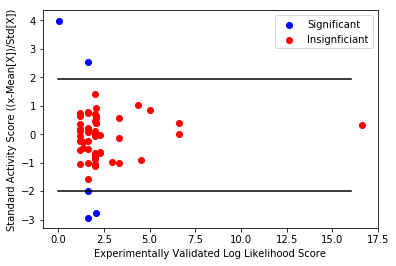

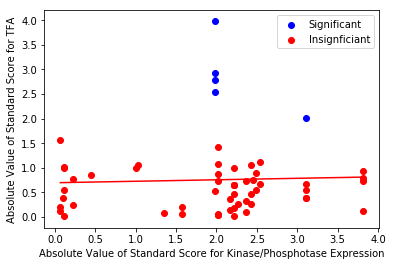

In [12]:
#transform matrix

normalizedMatrix  = TFAHelp.standardScore(matrix[:-1])

#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]

allInteractions = TFAHelp.flatten(TFAHelp.standardScore(TFAHelp.TFAWholeMatrix[:-1]))
pvalsInteractionsFound = TFAHelp.getPValuesForInteractions(interactionsFound,allInteractions)
        
alpha = .05 #fixed to find signfificance #.16 finds 2 significant 

uniqueInteractions = [inter for inter in interactions]

significantFoundInteractions,insignificantInteractions = TFAHelp.catagorizeInteractionsForSignificance(alpha,pvalsInteractionsFound)
print(significantFoundInteractions)


plt.scatter([interactions[inter] for inter in significantFoundInteractions],[interactionsFound[inter] for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([interactions[inter] for inter in insignificantInteractions],[interactionsFound[inter] for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
expectedInteractionLogScores = [interactions[inter] for inter in uniqueInteractions]
minLogScore = int(min(expectedInteractionLogScores))
maxLogScore = int(max(expectedInteractionLogScores)+1)

allInteractions.sort(reverse=True)
scoreCutoffHigh = allInteractions[int(np.floor((alpha/2)*len(allInteractions)))]
scoreCutoffLow = allInteractions[-1*int(np.ceil((alpha/2)*len(allInteractions)))]

print("Number of Found Significant Interactions: ",len(uniqueInteractions),len(significantFoundInteractions),"; alpha = ",alpha,scoreCutoffLow,scoreCutoffHigh)


plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffHigh for _ in range(minLogScore,maxLogScore)],c="black")
plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffLow for _ in range(minLogScore,maxLogScore)],c="black")

plt.xlabel("Experimentally Validated Log Likelihood Score")
plt.ylabel("Standard Activity Score ((x-Mean[X])/Std[X])") 


GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in uniqueInteractions:
    kinase = inter.split("_")[0]
    if not kinase in geneExpression:
        print "error"
        print kinase
    else:
        allScoresForKinase = [geneExpression[kinase2]["expression"][kinase] for kinase2 in geneExpression]
        kianseStdScore = (geneExpression[kinase]["expression"][kinase] - np.mean(allScoresForKinase))/np.std(allScoresForKinase)
        GEImpact[inter] = kianseStdScore
        xvals.append(abs(kianseStdScore))
        yvals.append(abs(interactionsFound[inter]))

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in significantFoundInteractions],[abs(interactionsFound[inter]) for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([abs(GEImpact[inter]) for inter in insignificantInteractions],[abs(interactionsFound[inter]) for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
plt.xlabel("Absolute Value of Standard Score for Kinase/Phosphotase Expression")
plt.ylabel("Absolute Value of Standard Score for TFA")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)


['yor061w_ykl185w', 'yhr135c_ylr256w', 'ykl139w_ykl185w', 'ypl031c_ykl185w', 'ykl139w_ylr403w']
('Number of Found Significant Interactions: ', 99, 5, '; alpha = ', 0.05, 0.23232376456848114)
(0.02938642411890462, 0.08977701302808165)


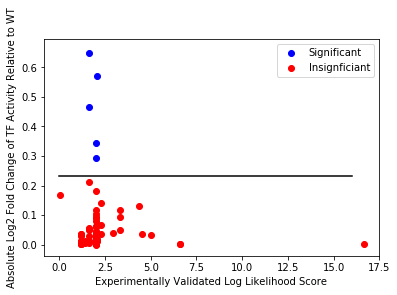

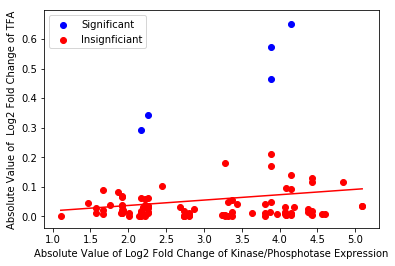

In [6]:
normalizedMatrix  = TFAHelp.absoluteLog2FoldChange(matrix)

#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]

allInteractions = TFAHelp.flatten(TFAHelp.absoluteLog2FoldChange(TFAHelp.TFAWholeMatrix[:-1]))
pvalsInteractionsFound = TFAHelp.getPValuesForInteractions(interactionsFound,allInteractions)
        
alpha = .05 #fixed to find signfificance

uniqueInteractions = [inter for inter in interactions]

significantFoundInteractions,insignificantInteractions = TFAHelp.catagorizeInteractionsForSignificance(alpha,pvalsInteractionsFound,False)
print(significantFoundInteractions)


plt.scatter([interactions[inter] for inter in significantFoundInteractions],[interactionsFound[inter] for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([interactions[inter] for inter in insignificantInteractions],[interactionsFound[inter] for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
expectedInteractionLogScores = [interactions[inter] for inter in uniqueInteractions]
minLogScore = int(min(expectedInteractionLogScores))
maxLogScore = int(max(expectedInteractionLogScores)+1)

allInteractions.sort(reverse=True)
scoreCutoffHigh = allInteractions[int(np.floor((alpha)*len(allInteractions)))]

print("Number of Found Significant Interactions: ",len(uniqueInteractions),len(significantFoundInteractions),"; alpha = ",alpha,scoreCutoffHigh)


plt.plot([x for x in range(minLogScore,maxLogScore)],[scoreCutoffHigh for _ in range(minLogScore,maxLogScore)],c="black")

plt.xlabel("Experimentally Validated Log Likelihood Score")
plt.ylabel("Absolute Log2 Fold Change of TF Activity Relative to WT") 


GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in uniqueInteractions:
	kinase = inter.split("_")[0]
	kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
	GEImpact[inter] = kianseStdScore
	xvals.append(abs(kianseStdScore))
	yvals.append(abs(interactionsFound[inter]))

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in significantFoundInteractions],[abs(interactionsFound[inter]) for inter in significantFoundInteractions],c = "b",label = "Significant")
plt.scatter([abs(GEImpact[inter]) for inter in insignificantInteractions],[abs(interactionsFound[inter]) for inter in insignificantInteractions],c="r",label = "Insignficiant")
plt.legend()
plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
plt.ylabel("Absolute Value of  Log2 Fold Change of TFA")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)

(0.013870780702795765, 0.3829252595482211)
(0.45068163592622296, 0.952)


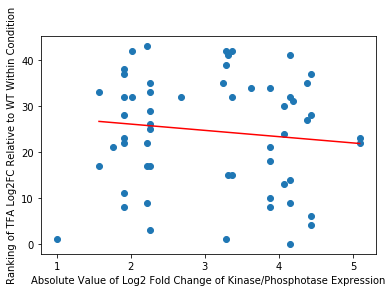

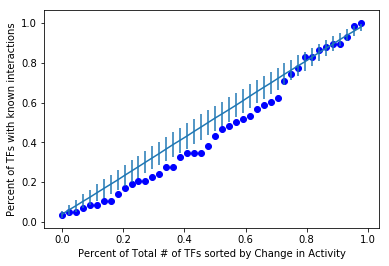

In [17]:
normalizedMatrix  = TFAHelp.rankingChange(matrix)

#match interactions
interactionsFound = {x[0]:-1 for x in expectedResults}
for tf in range(len(normalizedMatrix)-1):
    for kinase in range(len(normalizedMatrix[tf])):
        if kinases[kinase]+"_"+TFs[tf] in interactions:
            interactionsFound[kinases[kinase]+"_"+TFs[tf]] = normalizedMatrix[tf][kinase]
uniqueInteractions = [inter for inter in interactions]

GEImpact = {inter:-1 for inter in uniqueInteractions}
xvals = []
yvals = []
for inter in uniqueInteractions:
    kinase = inter.split("_")[0]
    try:
        kianseStdScore = np.abs(geneExpression[kinase]["ratio"][kinase])
        GEImpact[inter] = kianseStdScore
        xvals.append(abs(kianseStdScore))
        yvals.append(abs(interactionsFound[inter]))
    except:
        pass

plt.figure()
plt.scatter([abs(GEImpact[inter]) for inter in interactionsFound],[abs(interactionsFound[inter]) for inter in interactionsFound])
plt.xlabel("Absolute Value of Log2 Fold Change of Kinase/Phosphotase Expression")
plt.ylabel("Ranking of TFA Log2FC Relative to WT Within Condition")

positions = range(len(xvals))
positions.sort(key=lambda x: xvals[x])
xvals = [xvals[x] for x in positions]
yvals = [yvals[x] for x in positions]
slope,intercept,r,pvalue,_ = stats.linregress(xvals, yvals)
plt.plot(xvals,[x*slope+intercept for x in xvals],"r-")
print(r**2,pvalue)

###Generate Random Matrices to find Results:
plt.figure()

xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(interactionsFound,len(normalizedMatrix)-1)
AUC = np.trapz(ycoords,dx = 1.0/(len(xcoords)-1))

plt.scatter(xcoords,ycoords,c="b")


nsims = 1000
allxCoords = []
allyCoords = []
AUCs = []
for _ in range(nsims):
    tempMat = TFAHelp.generateRandomMatrix([row[:-1] for row in matrix])
    tempMat = [tempMat[row] + [matrix[row][-1]] for row in range(len(tempMat))]
    tempNormMat = TFAHelp.rankingChange(tempMat)
    tempinteractionsFound = {x[0]:-1 for x in expectedResults}
    for tf in range(len(normalizedMatrix)-1):
        for kinase in range(len(normalizedMatrix[tf])):
            if kinases[kinase]+"_"+TFs[tf] in interactions:
                tempinteractionsFound[kinases[kinase]+"_"+TFs[tf]] = tempNormMat[tf][kinase]
    xcoords,ycoords = TFAHelp.expectedInteractionFallInRankingLevel(tempinteractionsFound,len(normalizedMatrix)-1)
    AUCs.append(np.trapz(ycoords,dx = 1.0/(len(xcoords)-1)))
    allxCoords.append(xcoords)
    allyCoords.append(ycoords)

AUCs.sort(reverse=True)
index = 0
for val in AUCs:
    if AUC > val:
        index -= 1
        break
    index+=1
percentile = float(index)/len(AUCs)

print(AUC,percentile)
    
plt.errorbar(x = xcoords,y = np.mean(allyCoords,axis = 0),
             yerr = np.std(allyCoords,axis=0))
    
plt.xlabel("Percent of Total # of TFs sorted by Change in Activity")
plt.ylabel("Percent of TFs with known interactions")




In [8]:
TFAHelp.writeMatrix2csv(normalizedMatrix,open("normalizedTFAMatrix.csv","w"))

In [1]:
#overall distribution and statistical test

plt.figure()
plt.hist(allInteractions, bins = 40)
plt.xlabel("Score")
plt.ylabel("Frequency")

a = len(significantFoundInteractions)
b = len(uniqueInteractions)-a
c = int(alpha*len(allInteractions)) - a
d = len(allInteractions) - a - b - c

print(stats.fisher_exact([[a,b],[c,d]],alternative = "greater"))


NameError: name 'plt' is not defined